# Data Analysis
**Bill Xia**<br>
CS 136: Statistical Pattern Recognition<br>
Created: 4/17/24

Purpose: A space to perform exploratory data analysis on the data for our final project.

In [1]:
# Imports
import json
import numpy as np
import matplotlib.pyplot as plt

## Visualizing the Data

In [2]:
# Let's start by loading in the data and making sure that there's nothing
# obviously wrong with it.
fp = open('labeledAbstractSentences.json')
data = json.load(fp)
fp.close()

# data = { k: v for k, v in list(data.items())[:10] }

# Visualizing the data.
for k, v in data.items():
    # k_cleaned = k.translate(str.maketrans('', '', string.punctuation))
    # k_split = k_cleaned.strip().split()

    k_split = k.strip().split()

    for w in k_split:
        print(w, end=' ')
    print()
    for idx, l in enumerate(v):
        print(l, end=' ')
        for _ in range(len(k_split[idx]) - 1):
            print(' ', end='')
    print()

    assert(len(k_split) == len(v))

Muscle cramps are a common problem characterized by a sudden, painful, involuntary contraction of muscle. 
O      O      O   O O      O       O             O  O O       O        O           O           O  O       
These true cramps, which originate from peripheral nerves, may be distinguished from other muscle pain or spasm. 
O     O    O       O     O         O    O          O       O   O  O             O    O     O      O    O  O      
Medical history, physical examination, and a limited laboratory screen help to determine the various causes of muscle cramps. 
O       O        O        O            O   O O       O          O      O    O  O         O   O       O      O  O      O       
Despite the "benign" nature of cramps, many patients find the symptom very uncomfortable. 
O       O   O        O      O  O       O    O        O    O   O       O    O              
Treatment options are guided both by experience and by a limited number of therapeutic trials. 
O         O       O   O   

## Measuring Data Statistics

In [3]:
# Number of data points.
print(f'Number of Labeled Sentences: {len(data.keys())}')
print(f'Number of Sents w/ >0 ETs: {len( [1 for ll in data.values() if 'B' in ll] )}')
print(f'Number of Sents w/ >0 ETs of len >1: {len( [1 for ll in data.values() if 'I' in ll] )}')

Number of Labeled Sentences: 7606
Number of Sents w/ >0 ETs: 3201
Number of Sents w/ >0 ETs of len >1: 1356


In [4]:
# Sentence length data.
print(f'Avg Sentence Len (words): {round(np.mean( [len(sent.strip().split()) for sent in data.keys()] ), 2)}')

Avg Sentence Len (words): 22.54


## Measure Context Size

In [5]:
# Getting words before first EXT occurence in each sentence with EXTs.
words_before_first_occurence = []
for k, v in data.items():
    if 'B' in v:
        words_before_first_occurence.append(v.index('B'))
avg_words_before_first_occurrence = np.mean(words_before_first_occurence)
print(f'Avg Number of Words That Come Before Expert Terms: {avg_words_before_first_occurrence}')

Avg Number of Words That Come Before Expert Terms: 9.114026866604187


Number of sentences that begin with an expert term: 368.0 (11.5%)


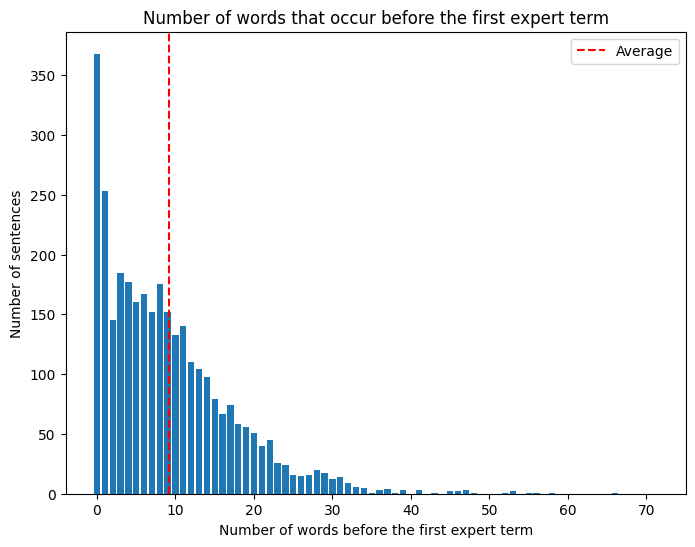

In [7]:
# Getting words_before_first_occurence counts.
x = np.array(range(max(words_before_first_occurence)))
y = np.zeros(max(words_before_first_occurence))
assert x.size == y.size
for idx in x:
    y[idx] = words_before_first_occurence.count(idx)
print(f'Number of sentences that begin with an expert term: {y[0]} ({100 * round(y[0] / np.sum(y), 4)}%)')

# Plotting words before first EXT occurrence in a bar graph.
fig, axes = plt.subplots(figsize=(8,6))
axes.bar(x, y)

axes.axvline(avg_words_before_first_occurrence, color='r', linestyle='--', label='Average')

axes.set_title('Number of words that occur before the first expert term')
axes.set_xlabel('Number of words before the first expert term')
axes.set_ylabel('Number of sentences')
axes.legend()

plt.show()